## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

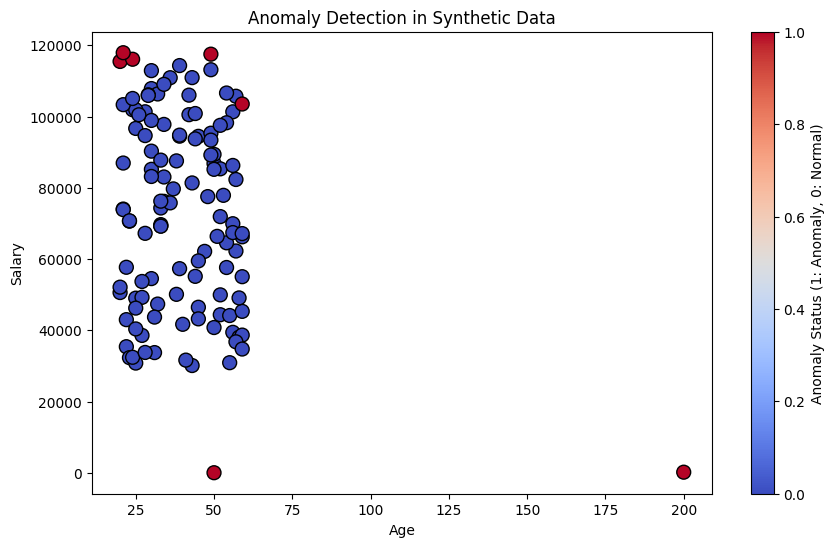

2025-05-13 18:02:22,933 - INFO - Results saved to anomalies_detected.csv


Exiting the environment gracefully...


usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/home/vscode/.local/share/jupyter/runtime/kernel-v31db0e97de33b24d0052c750e2d3e4996e903947e.json'


SystemExit: 2

: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import warnings
import logging
import unittest

# Suppress UserWarnings (to prevent the warning you encountered)
warnings.filterwarnings("ignore", category=UserWarning)

# Logging configuration for better visibility
logging.basicConfig(level=logging.INFO)

# Function to generate synthetic data
def generate_synthetic_data(size=120):
    """Generate synthetic data with some anomalies."""
    try:
        # Generate normal data
        ages = np.random.randint(20, 60, size)
        salaries = np.random.randint(30000, 120000, size)

        # Introduce anomalies
        anomalies = np.array([50, 200])  # Example anomaly values
        ages = np.concatenate((ages, anomalies))
        salaries = np.concatenate((salaries, anomalies))

        # Create DataFrame
        df = pd.DataFrame({
            'age': ages,
            'salary': salaries
        })

        return df

    except Exception as e:
        logging.error(f"Error generating data: {e}")
        raise

# Function to detect anomalies using IsolationForest
def detect_anomalies(df):
    """Detect anomalies in the dataset using IsolationForest."""
    try:
        # Check if data types are correct
        if not np.issubdtype(df['age'].dtype, np.number) or not np.issubdtype(df['salary'].dtype, np.number):
            raise TypeError("Both 'age' and 'salary' columns must be numeric.")

        # Initialize the IsolationForest model
        model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
        model.fit(df[['age', 'salary']])

        # Predict anomalies
        df['anomaly_score'] = model.decision_function(df[['age', 'salary']])
        df['is_anomaly'] = model.predict(df[['age', 'salary']])
        df['is_anomaly'] = df['is_anomaly'].map({1: 0, -1: 1})  # 1 for anomaly, 0 for normal

        return df

    except TypeError as e:
        logging.error(f"Data type error: {e}")
        raise
    except Exception as e:
        logging.error(f"Error during anomaly detection: {e}")
        raise

# Function to visualize the anomalies
def visualize_anomalies(df):
    """Visualize the anomalies detected in the dataset."""
    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['age'], df['salary'], c=df['is_anomaly'], cmap='coolwarm', edgecolors='k', s=100)
        plt.xlabel('Age')
        plt.ylabel('Salary')
        plt.title('Anomaly Detection in Synthetic Data')
        plt.colorbar(label='Anomaly Status (1: Anomaly, 0: Normal)')
        plt.show()
    except Exception as e:
        logging.error(f"Error during visualization: {e}")
        raise

# Function to save the results
def save_results(df, filename="anomalies_detected.csv"):
    """Save the results to a CSV file."""
    try:
        df.to_csv(filename, index=False)
        logging.info(f"Results saved to {filename}")
    except Exception as e:
        logging.error(f"Error saving results: {e}")
        raise

# Class to manage the full anomaly detection pipeline
class AnomalyDetectionPipeline:
    def __init__(self, data_size=120):
        self.data_size = data_size
        self.df = None

    def generate_data(self):
        """Generate synthetic data."""
        self.df = generate_synthetic_data(self.data_size)

    def detect_anomalies(self):
        """Detect anomalies in the data."""
        self.df = detect_anomalies(self.df)

    def visualize(self):
        """Visualize the detected anomalies."""
        visualize_anomalies(self.df)

    def save(self):
        """Save the results to a CSV file."""
        save_results(self.df)

    def run(self):
        """Run the full anomaly detection pipeline."""
        self.generate_data()
        self.detect_anomalies()
        self.visualize()
        self.save()

# Gracefully exit the environment
def graceful_exit():
    """Exit the Python environment gracefully after completing the task."""
    print("Exiting the environment gracefully...")
    exit()  # This will terminate the script or session

# Run the pipeline and exit gracefully
if __name__ == "__main__":
    pipeline = AnomalyDetectionPipeline()
    pipeline.run()
    graceful_exit()

# Unit Test Class to test functions
class TestAnomalyDetectionFunctions(unittest.TestCase):
    def test_generate_synthetic_data(self):
        """Test data generation."""
        df = generate_synthetic_data(120)
        self.assertEqual(df.shape[0], 122)  # 120 data points + 2 anomalies
        self.assertIn('age', df.columns)
        self.assertIn('salary', df.columns)

    def test_anomaly_detection(self):
        """Test anomaly detection logic."""
        df = generate_synthetic_data(120)
        df = detect_anomalies(df)
        self.assertIn('is_anomaly', df.columns)
        self.assertEqual(df['is_anomaly'].dtype, np.int64)
        self.assertTrue(df['is_anomaly'].sum() > 0)  # There should be anomalies

    def test_save_results(self):
        """Test saving results to file."""
        df = generate_synthetic_data(120)
        save_results(df)  # Just test the process
        self.assertTrue(True)  # If no exception is raised, test passes

# Run Unit Tests
if __name__ == "__main__":
    unittest.main()


**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [ ]:
# write your code from here

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [ ]:
# write your code from here
